<div class="alert alert-success">
  <b> ✔️Комментарий ревьюера ✔️</b>

Привет, Даниил! Меня зовут Михаил, я буду проверять твой проект. Предлагаю общаться на 'ты' :)
Однако, если это неудобно - сообщи, и мы перейдем на 'Вы'. Моя главная цель —  поделиться с тобой своим опытом и помочь тебе стать аналитиком данных, а не только указать на совершенные тобой ошибки.

Видно, что к проекту приложен большой труд. Все ключевые этапы в работе выполнены, статистическое исследование проведено качественно. Так что в целом справиться с задачей тебе удалось.

Есть несколько аспектов, которые **требуют** твоего **внимания**. Комментарии по ним помечены красным цветом и символами ❌. После их доработки проект будет принят, осталось совсем немного :) 
    

Давай работать над проектом в диалоге: если **ты что-то меняешь** в проекте по моим рекомендациям — **пиши об этом**. Мне будет легче отследить изменения, если ты будешь использовать синюю форму, которую я прикреплю ниже. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 



Жду проект на повторное ревью. Успехов в изучении!



</div>
<div class="alert alert-block alert-danger"> <b>❌ Комментарий ревьюера ❌</b> 
    Так я выделяю моменты, которые требуют особого внимания. Нужно будет учесть их и внести корректировки в свою работу. </div>
<div class="alert alert-block alert-warning"> <b>⚠️ Комментарий ревьюера ⚠️</b> 
    Желтым я отмечу рекомендации, которые, могут быть полезными при твоей работе. Они носят рекомендационный характер, но будет классно, если ты будешь учитывать их при работе.</div>
<div class="alert alert-block alert-success"> <b>✔️ Комментарий ревьюера ✔️</b>
    Так я выделяю удачные и элегантные решения, на которые можно опираться в будущих проектах.</div>
<div class="alert alert-block alert-info">
    
А в таком блоке ты можешь оставить комментарии для меня 
    
</div>

# Сборный проект-2 

## Описание проекта

Мы работаем в стартапе, который продает продукты питания.

## Описание данных

Каждая запись в логе — это действие пользователя, или событие. 
- EventName — название события;
- DeviceIDHash — уникальный идентификатор пользователя;
- EventTimestamp — время события;
- ExpId — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

### Цель проекта

Понять как пользоваетли ведут себя нашего мобильного приложения. 

### План работы

#### 1. Изучить данные 
#### 2. Предобработка данных
#### 3. Изучить воронку событий
#### 4. Изучить результаты эксперемнта


<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Хорошее введение в проект - пригодится в будущем, когда соберешь большое портфолио и откроешь проект вновь👍

</div>


### 1. Изучаем данные

Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math as mth
from scipy import stats as st

Читаем таблицу

In [2]:
logs = pd.read_csv('datasets/logs_exp.csv', sep = '\t')

Выводим первые пять строк таблицы

In [3]:
logs.head(5)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


Смотрим информацию о таблице

In [4]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


### 2. Предобработка данных

Меняем названия столбцов

In [5]:
logs = logs.rename(columns = {'EventName':'event', 'DeviceIDHash':'user_id', 'EventTimestamp': 'event_time', 'ExpId': 'exp_id'})

In [6]:
logs

,event,user_id,event_time,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


Проверяем пропуски 

In [7]:
logs.isna().sum()

event         0
user_id       0
event_time    0
exp_id        0
dtype: int64

Пропусков нет

Проверим дубликаты

In [8]:
logs.duplicated().sum()

413

Дубликаты есть, но из очень мало отностительно размера таблицы. Удаляем их

In [9]:
logs = logs.drop_duplicates()

Добавляем меняем тип данных столбца event_time и добовляем столбец date с датой события

In [10]:
logs['event_time'] = pd.to_datetime(logs['event_time'], unit = 's')
logs['date'] = logs['event_time'].dt.date

C:\Users\dan25\AppData\Local\Temp\ipykernel_5180\1022350964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logs['event_time'] = pd.to_datetime(logs['event_time'], unit = 's')
C:\Users\dan25\AppData\Local\Temp\ipykernel_5180\1022350964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logs['date'] = logs['event_time'].dt.date


<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Очень хорошо, что не забываешь проверять данные на наличие пропусков и дубликатов.  Молодец, что приводишь даты к нужному формату - предобработка проведена отлично.

</div>

### 3. Изучение и проверка данных

In [11]:
logs

,event,user_id,event_time,exp_id,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


Посчитаем сколько событий 

In [12]:
events = logs['event'].count()
events

243713

Посчитаем сколько пользоваетелей в логе

In [13]:
users = logs['user_id'].nunique()
users

7551

Сколько событий приходится на одного пользователя в среднем

In [14]:
mean_event_per_user = round(events/users)
mean_event_per_user

32

Данными за какой период у нас есть.

In [15]:
logs['date'].min()

datetime.date(2019, 7, 25)

In [16]:
logs['date'].max()

datetime.date(2019, 8, 7)

<Axes: >

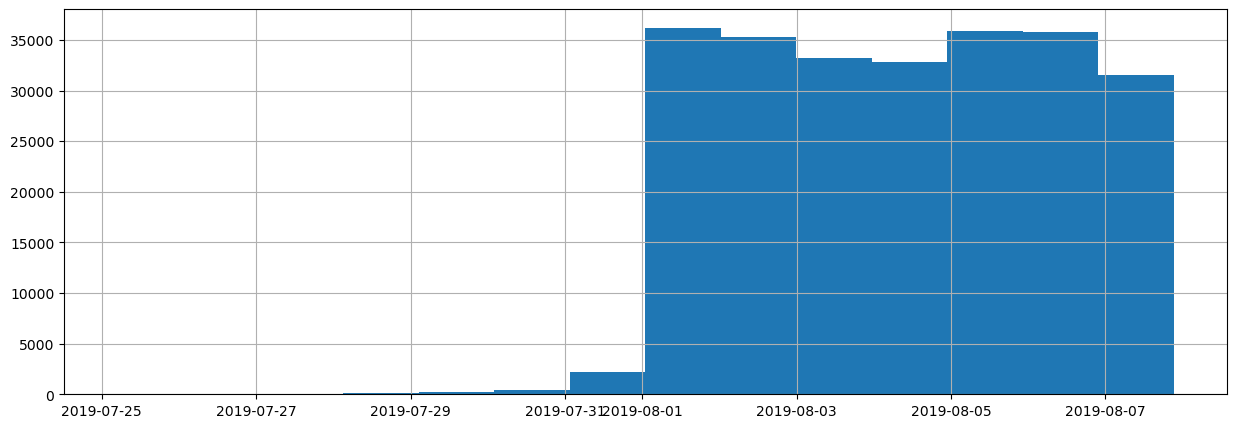

In [17]:
logs['event_time'].hist(figsize = (15,5), bins = 14)

Из гистограммы видно что мы имеем полные данные только за период с 1 по 7 августа. В дни ранее этого периода данных слишком мало. Отбрасываем пользователей которые не входят в этот период.


In [18]:
logs

,event,user_id,event_time,exp_id,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


In [19]:
date_filter = pd.to_datetime('2019-08-01')
logs = logs[logs['date'] >= date_filter]

C:\Users\dan25\AppData\Local\Temp\ipykernel_5180\3943105359.py:2: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  logs = logs[logs['date'] >= date_filter]


Проверим сколько пользователей и событий мы потеряли после фильтрации.

In [20]:
print(logs['event'].count())
e_part = ((events - logs['event'].count()) / events) * 100
round(e_part,2)

240887


1.16

In [21]:
print(logs['user_id'].nunique())
u_part = ((users - logs['user_id'].nunique()) / users)* 100
round(u_part,2)

7534


0.23

Потери совсем не велики.

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Стоит также расчитать доли потерь по событиям и уникальным пользователям в процентах

</div>


<div class="alert alert-block alert-info">
    
Добавил
    
</div>

Смотрим сохранились ли у нас пользователи во всех трех эксперементальных группах

In [22]:
logs['exp_id'].value_counts()

248    84563
246    79302
247    77022
Name: exp_id, dtype: int64

У нас есть дастаточное количество пользователей во всех группах

### 4. Изучаем воронку событий

In [23]:
gog = logs.pivot_table(index = 'event', values = 'user_id', aggfunc = {'count' ,'nunique'}).reset_index().sort_values(by = 'nunique', ascending = False)
gog['%'] = round((gog['nunique'] / gog.loc[1,'nunique']) * 100, 2)
gog


,event,count,nunique,%
1,MainScreenAppear,117328,7419,100.00
2,OffersScreenAppear,46333,4593,61.91
0,CartScreenAppear,42303,3734,50.33
3,PaymentScreenSuccessful,33918,3539,47.70
4,Tutorial,1005,840,11.32


<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Не рекомендую прописывать числа для расчетов самостоятельно c клавиатуры (7419) - легко допустить ошибку, и расчеты будут не верны. Если же мы получим число непосредственно из данных с помощью кода - такой проблемы не будет 
   

</div>


<div class="alert alert-block alert-info">
    
Исправил
    
</div>

События идут в следуещем порядке
- MaitScreenAppear - главный экран приложения
- Tutorial - обучение использования приложения(обычно у пользоваетеля есть возможность пропустить этот шаг)
- OffersScreenAppear - экран с товароми(предложение о покупке)
- CartScreenAppear - корзина
- PaymentScreenSuccesful - экран успешной оплаты

Среди всех событий стоит не учитывать Tutorial. Из таблицы видно что большенство пользователей поропустило этот шаг. 

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️** 
   Мы действительно можем не учитывать этап обучения - его посещает наименьшее число пользователей - вероятнее всего, его пропускают
</div>


In [24]:
logs = logs[logs['event'] != 'Tutorial']

In [45]:
users = logs.pivot_table(index='user_id', 
                         columns='event', 
                         values='event_time',
                         aggfunc='min')
step_1 = ~users['MainScreenAppear'].isna()
step_2 = ~users['OffersScreenAppear'].isna()
step_3 = step_2 & (users['CartScreenAppear'] > users['OffersScreenAppear'])
step_4 = step_3 & (users['PaymentScreenSuccessful'] > users['CartScreenAppear'])

n_main_screen = users[step_1].shape[0]
n_offer = users[step_2].shape[0]
n_cart = users[step_3].shape[0]
n_payment_successful = users[step_4].shape[0]

<div class="alert alert-block alert-info">
    
не понимаю
    
</div>

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Фильтровать события таким образом не стоит, так как у нас нет обязательного условия посещения MainScreenAppear для совершения покупки

</div>


In [67]:
import plotly.express as px
title = {"position": "top center", "text": "Sales for Sale Person A in U.S."}
data = dict(
    number=[n_main_screen,n_offer,n_cart,n_payment_successful],
    event=["Главный экран", "Экран с товарами", "Корзина", "Покупка"])
fig = px.funnel(data, x='number', y='event')
fig.show()

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   А зачем использовать циклы? Вот отличная статья по построению воронок в plotly: https://habr.com/ru/company/otus/blog/588190/ - единственное, в ней данные для построения задаются вручную - а этого стоит избегать во избежание случайных ошибок. Также не забудь добавить заголовок у воронки

</div>


<div class="alert alert-block alert-info">
    
Прошлый тоже брал с хабра. 
    
</div>

In [47]:
print('Главный экран:', (n_main_screen / n_main_screen) * 100)
print('Экран предложения:', (n_offer / n_main_screen) * 100)
print('Переход к корзине:', (n_cart / n_offer) * 100)
print('Оплата:', (n_payment_successful / n_cart) * 100)

Главный экран: 100.0
Экран предложения: 61.908613020622724
Переход к корзине: 43.97996951883301
Оплата: 24.85148514851485


Только 454 пользователя дошли от начала до конца, "посетив" все этапы.
Все остальные пользователи не начинают с начала

### 5. Результаты эксперимента 

In [ ]:
logs.groupby('exp_id')['user_id'].nunique().to_frame()

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Стоит проверить, чтобы каждый пользователь принадлежал только одной группе
</div>


In [ ]:
users_by_events = logs.pivot_table(index = 'exp_id',
                                   columns = 'event',
                                   values = 'user_id',
                                   aggfunc = 'nunique').reset_index()
users_by_events

In [ ]:
users_count = logs.groupby('exp_id')['user_id'].nunique()
users_by_events['users_count'] = users_by_events['exp_id'].apply(lambda x: users_count.loc[x])
users_by_events = users_by_events.set_index('exp_id')
users_by_events

In [ ]:

new_row = users_by_events.loc[246] + users_by_events.loc[247]
new_row.name = '246_247'
users_by_events = users_by_events.append([new_row])
users_by_events = users_by_events[['MainScreenAppear', 'OffersScreenAppear',
                                   'CartScreenAppear', 'PaymentScreenSuccessful', 'users_count']]
users_by_events = users_by_events.reindex([246, 247, '246_247', 248])
users_by_events

In [ ]:
alpha = .01

#создадим ф-цию для проверки различий

def p_estimation (new, previous):
    # пропорция успехов в первой группе
    p_first = new[0]/previous[0]
    # пропорция успехов во второй группе
    p_second = new[1]/previous[1]
    # пропорция успехов в комбинированном датасете
    p_combined = (new[0] + new[1]) / (previous[0] + previous[1])
    # разница пропорций
    difference = p_first - p_second
    # считаем статистику в отклонениях стандратного норм.распеделения
    z_value = (difference / mth.sqrt(p_combined*(1 - p_combined)
                                    * (1/previous[0] + 1/previous[1])))
    # задаем стандартное норм.распределение
    distr = st.norm(0, 1)
    
    p_value = (1 - distr.cdf(abs(z_value)))*2
    
    print('р-значение:', p_value)
    if (p_value < alpha):
        print("значимая разница")
    else:
        print("нету разницы")

In [ ]:
p_estimation(new = np.array([3062, 1531]), previous = np.array([4926, 2493]))
p_estimation(new = np.array([2504, 1230]), previous = np.array([3062, 1531]))
p_estimation(new = np.array([2358, 1181]), previous = np.array([2504, 1230])) 
print('Bсе комбинации между объедененными группами А1/А2 и группой В')
print('-------------------------------------------------------------------')
# проверяем все комбинации между группами 246 и 247

p_estimation(new = np.array([1542, 1520]), previous = np.array([2450, 2476]))
p_estimation(new = np.array([1266, 1238]), previous = np.array([1542, 1520]))
p_estimation(new = np.array([1200, 1158]), previous = np.array([1266, 1238]))
print('Bсе комбинации между группами 246 и 247')
print('-------------------------------------------------------------------')

# между группами 246 и 248

p_estimation(new = np.array([1542, 1531]), previous = np.array([2450, 2493]))
p_estimation(new = np.array([1266, 1230]), previous = np.array([1542, 1531]))
p_estimation(new = np.array([1200, 1181]), previous = np.array([1266, 1230]))
print('Bсе комбинации между группами 246 и 248')
print('-------------------------------------------------------------------')

# между группами 247 и 248

p_estimation(new = np.array([1520, 1531]), previous = np.array([2476, 2493]))
p_estimation(new = np.array([1238, 1230]), previous = np.array([1520, 1531]))
p_estimation(new = np.array([1158, 1181]), previous = np.array([1238, 1230]))
print('Bсе комбинации между группами 247 и 248')


<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Здесь также ручной ввод, который нужно устранить. Почему у нас всего 12 проверок? Мы проверяем последовательно по 4 события в каждом из сравнений групп. Сначала смотрим, какая доля пользователей от общего числа пользователей в группе 246 посещает MainScreen и сравниваем ее с аналогичной долей 247. Затем CartScreen и так далее. Мы проверяем не конверсии с предыдущего этапа

</div>


При условии alpha .01 - значимая разница для комбинации между группами 247 и 248 для событий PaymentScreenSuccessful | CartScreenAppear


- Общее кол-ство событий в логах - 244126
- Кол-ство пользователей - 7551
- Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные», поэтому мы сделали срез и фактический диапазон дат стал с 1.08.2019 - 7.08.2019
- Самое популярное событие - MainScreenAppear
- Событие, которое реже всего используется пользователями - Tutorial
- Как видим, цепочка выглядит как MainScreenAppear (главный экран) > OffersScreenAppear (экран предложения) > CartScreenAppear (корзина) > PaymentScreenSuccessful (старница успешной оплаты) сам же этам Tutorial (руководство) редко используется пользователями

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Даниил, проведен основательный и подробный анализ. Все наглядно - графики и гистограммы подтверждают обоснованные выводы. Учти мои замечания. Возможно, придется немного подправить выводы. Жду твой проект на повторное ревью. Успехов!

</div>
